# Web Scraping - Table

In [3]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import requests
import json
from github import Github
from flask import jsonify

web_link = "https://gist.github.com/paulmillr/2657075"

def get_names(link):

    soup = BeautifulSoup(requests.get(link).text, "html.parser")

    table = soup.find("table")
    table_data = table.find_all("td")
    data = []

    for info in table_data :
        data.append(info.text)


    table_data = pd.DataFrame(np.array(data).reshape(256,4), columns=['Name', 'Contributions', 'Location', 'ToDrop'])
    table_data = table_data.drop(['ToDrop'], axis=1)
    print(table_data)

In [4]:
get_names(web_link)

                                        Name Contributions  \
0                  fabpot (Fabien Potencier)         12947   
1                    andrew (Andrew Nesbitt)         10188   
2               taylorotwell (Taylor Otwell)          8376   
3                            egoist (EGOIST)          7688   
4               HugoGiraudel (Hugo Giraudel)          7658   
5               ornicar (Thibault Duplessis)          7341   
6                  bebraw (Juho Vepsäläinen)          6895   
7                          nelsonic (Nelson)          6501   
8               alexcrichton (Alex Crichton)          6145   
9                  jonathanong (jongleberry)          5763   
10                 mikermcneil (Mike McNeil)          5736   
11                    benbalter (Ben Balter)          5699   
12                    jxnblk (Brent Jackson)          5601   
13                yegor256 (Yegor Bugayenko)          5566   
14                               orta (Orta)          5453   
15      

# Web Scraping - Specific cells

In [ ]:
import requests
import unittest
from bs4 import BeautifulSoup
import pandas as pd

website_prefix = "https://www.reuters.com/finance/stocks/financial-highlights/"
stock_mkt = "PA"
stock_name = ['AIR', 'LVMH', 'DANO']

df = []

for j in stock_name :

    def _handle_request_result_and_build_soup(request_result):
        if request_result.status_code == 200:
            html_doc =  request_result.text
            soup = BeautifulSoup(html_doc,"html.parser")
        return soup

    url = website_prefix + j + "." + stock_mkt
    res = requests.get(url)
    soup = _handle_request_result_and_build_soup(res)

    data = []
    sp = []
    change_per = []

    print((((((soup.find("span", class_="valueContent")).text).replace("\n", "").replace("	    						    ", "")).replace("€", "")).split("					            ")[0]))

    data.extend(list(map(lambda x: (((x.text).replace(",", "")).replace("--", "0")), soup.find_all("td", class_="data"))))
    change_per.extend(list(map(lambda x: x.split("\t"), (((((soup.find("span", class_="valueContent")).text).replace("\n", "").replace("	    						    ", "")).replace("€", "")).split("					            ")[0]))))
    sp.extend(list(map(lambda x: (((x.text).replace("\n\n\t\t\t\t", "")).replace("EUR", "")).split("\n"), soup.find_all("div", class_="sectionQuoteDetail"))))
    print(change_per)

# Working with APIs

In [ ]:
import pandas as pd
import requests
import xlrd

population = pd.read_excel("ensemble.xls", skiprows=7, sheet_name = 'Communes')
population = population[["Nom de la commune", "Population totale", "Code département"]]
population = population.sort_values(by=["Population totale"], ascending = False)
# "~" negates the condition
population = population[~population['Nom de la commune'].str.contains('Paris')]
LIMIT = 30

population = population[3:10]

API_key = open("api_key.txt", "r").read()

url_template = "https://maps.googleapis.com/maps/api/distancematrix/json?units=metric&origins={}&destinations={}&key={}"
origins = '|'.join(population['Nom de la commune'])
destinations = '|'.join(population['Nom de la commune'])
url_formatted = url_template.format(origins, destinations,API_key)


results = requests.get(url_formatted).json()

# Test Driven Development

In [1]:
import unittest #Library that allows tests

def array_front9(nums):
    for index, element in enumerate(nums):
        #enumerate permet de boucler sur l'index et la valeur
        if index <= 3 and element == 9 :
            return True
    return False

#We now want to check that our function works
class Lesson1Tests(unittest.TestCase):

    def testArrayFront9(self):

	   #Pre-defined tests and results
        self.assertEqual(array_front9([1, 2, 9, 3, 4]) , True)
        self.assertEqual(array_front9([1, 2, 3, 4, 9]) , False)
        self.assertEqual(array_front9([1, 2, 3, 4, 5]) , False)

def main():
    unittest.main()
    #If all tests are concluent, will return True


# Create map

In [28]:
import pandas as pd
import folium
from matplotlib.colors import Normalize, rgb2hex
import matplotlib.cm as cm

In [145]:
data = pd.read_csv('http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_day.csv')
norm = Normalize(data['mag'].min(), data['mag'].max())


map = folium.Map(location=[48, -102], zoom_start=3, png_enabled =True)
for eq in data.iterrows():
    color = rgb2hex(cm.OrRd(norm(float(eq[1]['mag']))))
    folium.CircleMarker(location = [eq[1]['latitude'], eq[1]['longitude']], fill_color=color,popup=eq[1]['place'], 
                    radius=4*float(eq[1]['mag']),color=color
                    ).add_to(map)
map.save('map.png')
    

In [168]:
import IPython
iframe = "<iframe width='100%'' height='800' frameborder='0' scrolling='no' src='map.html'></iframe>"
IPython.display.HTML(iframe)

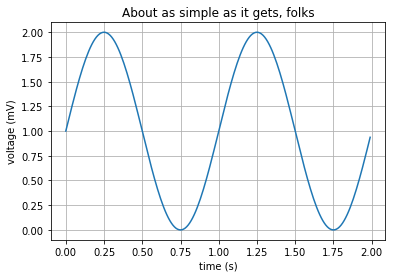

In [129]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

plt.show()

# Generate report

In [123]:
from reportlab.pdfgen import canvas
 
c = canvas.Canvas("hello.pdf")
c.drawString(100,750,"Welcome to Reportlab!")
c.save()

In [165]:
%%javascript
require(["base/js/namespace"],function(Jupyter) {
    Jupyter.notebook.save_checkpoint();
});

<IPython.core.display.Javascript object>

In [166]:
import os
os.system("jupyter nbconvert --to slides Summary.ipynb")
#latest modif

0

# Send Email report

In [163]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email import encoders
 
fromaddr = "mael.fabien@gmail.com"
toaddr = "mael.fabien@gmail.com"
 
msg = MIMEMultipart()
 
msg['From'] = fromaddr
msg['To'] = toaddr
msg['Subject'] = "Hackathon groupe baseline-college"
 
body = '''Bonjour Charles, 


Vous trouverez en pièce jointe de ce mail notre travail pour le Hackathon du MS Big Data.


Meilleures salutations,


Anatoli, Raphaël, Anthony, Alexandre, Maël 

'''
 
msg.attach(MIMEText(body, 'plain'))
 
filename = "Summary.html"
attachment = open(filename, "rb")
 
part = MIMEBase('application', 'octet-stream')
part.set_payload((attachment).read())
encoders.encode_base64(part)
part.add_header('Content-Disposition', "attachment; filename= %s" % filename)
 
msg.attach(part)
 
server = smtplib.SMTP('smtp.gmail.com', 587)
server.starttls()
server.login(fromaddr, "solenn98")
text = msg.as_string()
server.sendmail(fromaddr, toaddr, text)
server.quit()

(221, b'2.0.0 closing connection h203sm6894917wma.19 - gsmtp')

In [167]:
import os 
import smtplib

from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email.mime.image import MIMEImage
from email import encoders

with open('Login.txt', 'r') as file:
    gmail_pwd = file.read()

#Set up crap for the attachments
#files = "/tmp/test/dbfiles"
filenames = ["Summary.html", "map.html"]
#print filenames


#Set up users for email
gmail_user = "mael.fabien@gmail.com"
#gmail_pwd = open('Login.txt', 'r')
recipients = ['anatoli.db@gmail.com','anthonyhoudaille@gmail.com', 'raphael.lederman@wanadoo.fr', 'alexandre.bec@telecom-paristech.fr']

#Create Module
def mail(to, subject, text, attach):
    msg = MIMEMultipart()
    msg['From'] = gmail_user
    msg['To'] = ", ".join(recipients)
    msg['Subject'] = subject

    msg.attach(MIMEText(text))

    #get all the attachments
    for file in filenames:
        part = MIMEBase('application', 'octet-stream')
        part.set_payload(open(file, 'rb').read())
        encoders.encode_base64(part)
        part.add_header('Content-Disposition', 'attachment; filename="%s"' % file)
        msg.attach(part)

    mailServer = smtplib.SMTP("smtp.gmail.com", 587)
    mailServer.ehlo()
    mailServer.starttls()
    mailServer.ehlo()
    mailServer.login(gmail_user, gmail_pwd)
    mailServer.sendmail(gmail_user, to, msg.as_string())
    # Should be mailServer.quit(), but that crashes...
    mailServer.close()

body = '''Bonjour Charles, 


Vous trouverez en pièce jointe de ce mail notre travail pour le Hackathon du MS Big Data.


Meilleures salutations,


Anatoli, Raphaël, Anthony, Alexandre, Maël 

'''
#send it
mail(recipients,"Hackathon",body,filenames)